<a href="https://colab.research.google.com/github/dattaayon7/Parkinson-s-Detection/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os, sys

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
!pip install lux  #Lux library for data visualisation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 KB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.7 MB/s eta 0:00:00
  Created wheel for lux: filename=lux-0.5.1-py3-none-any.whl size=11979 sha256=7371

In [ ]:
import lux
import pandas as pd

from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
df=pd.read_csv('parkinsons.data')
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df.shape

(195, 24)

In [ ]:
df.isnull().sum()  #check null value

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df.dtypes   #finding datatypes of the attributes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


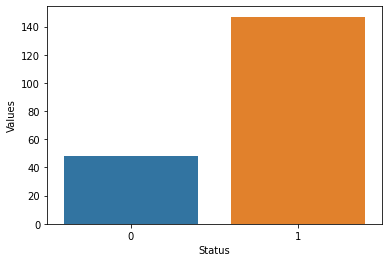

In [ ]:
#Check label imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df["status"].value_counts()
temp_df = pd.DataFrame({'Status': temp.index,'Values':temp.values})
print(sns.barplot(x = 'Status', y='Values', data=temp_df))


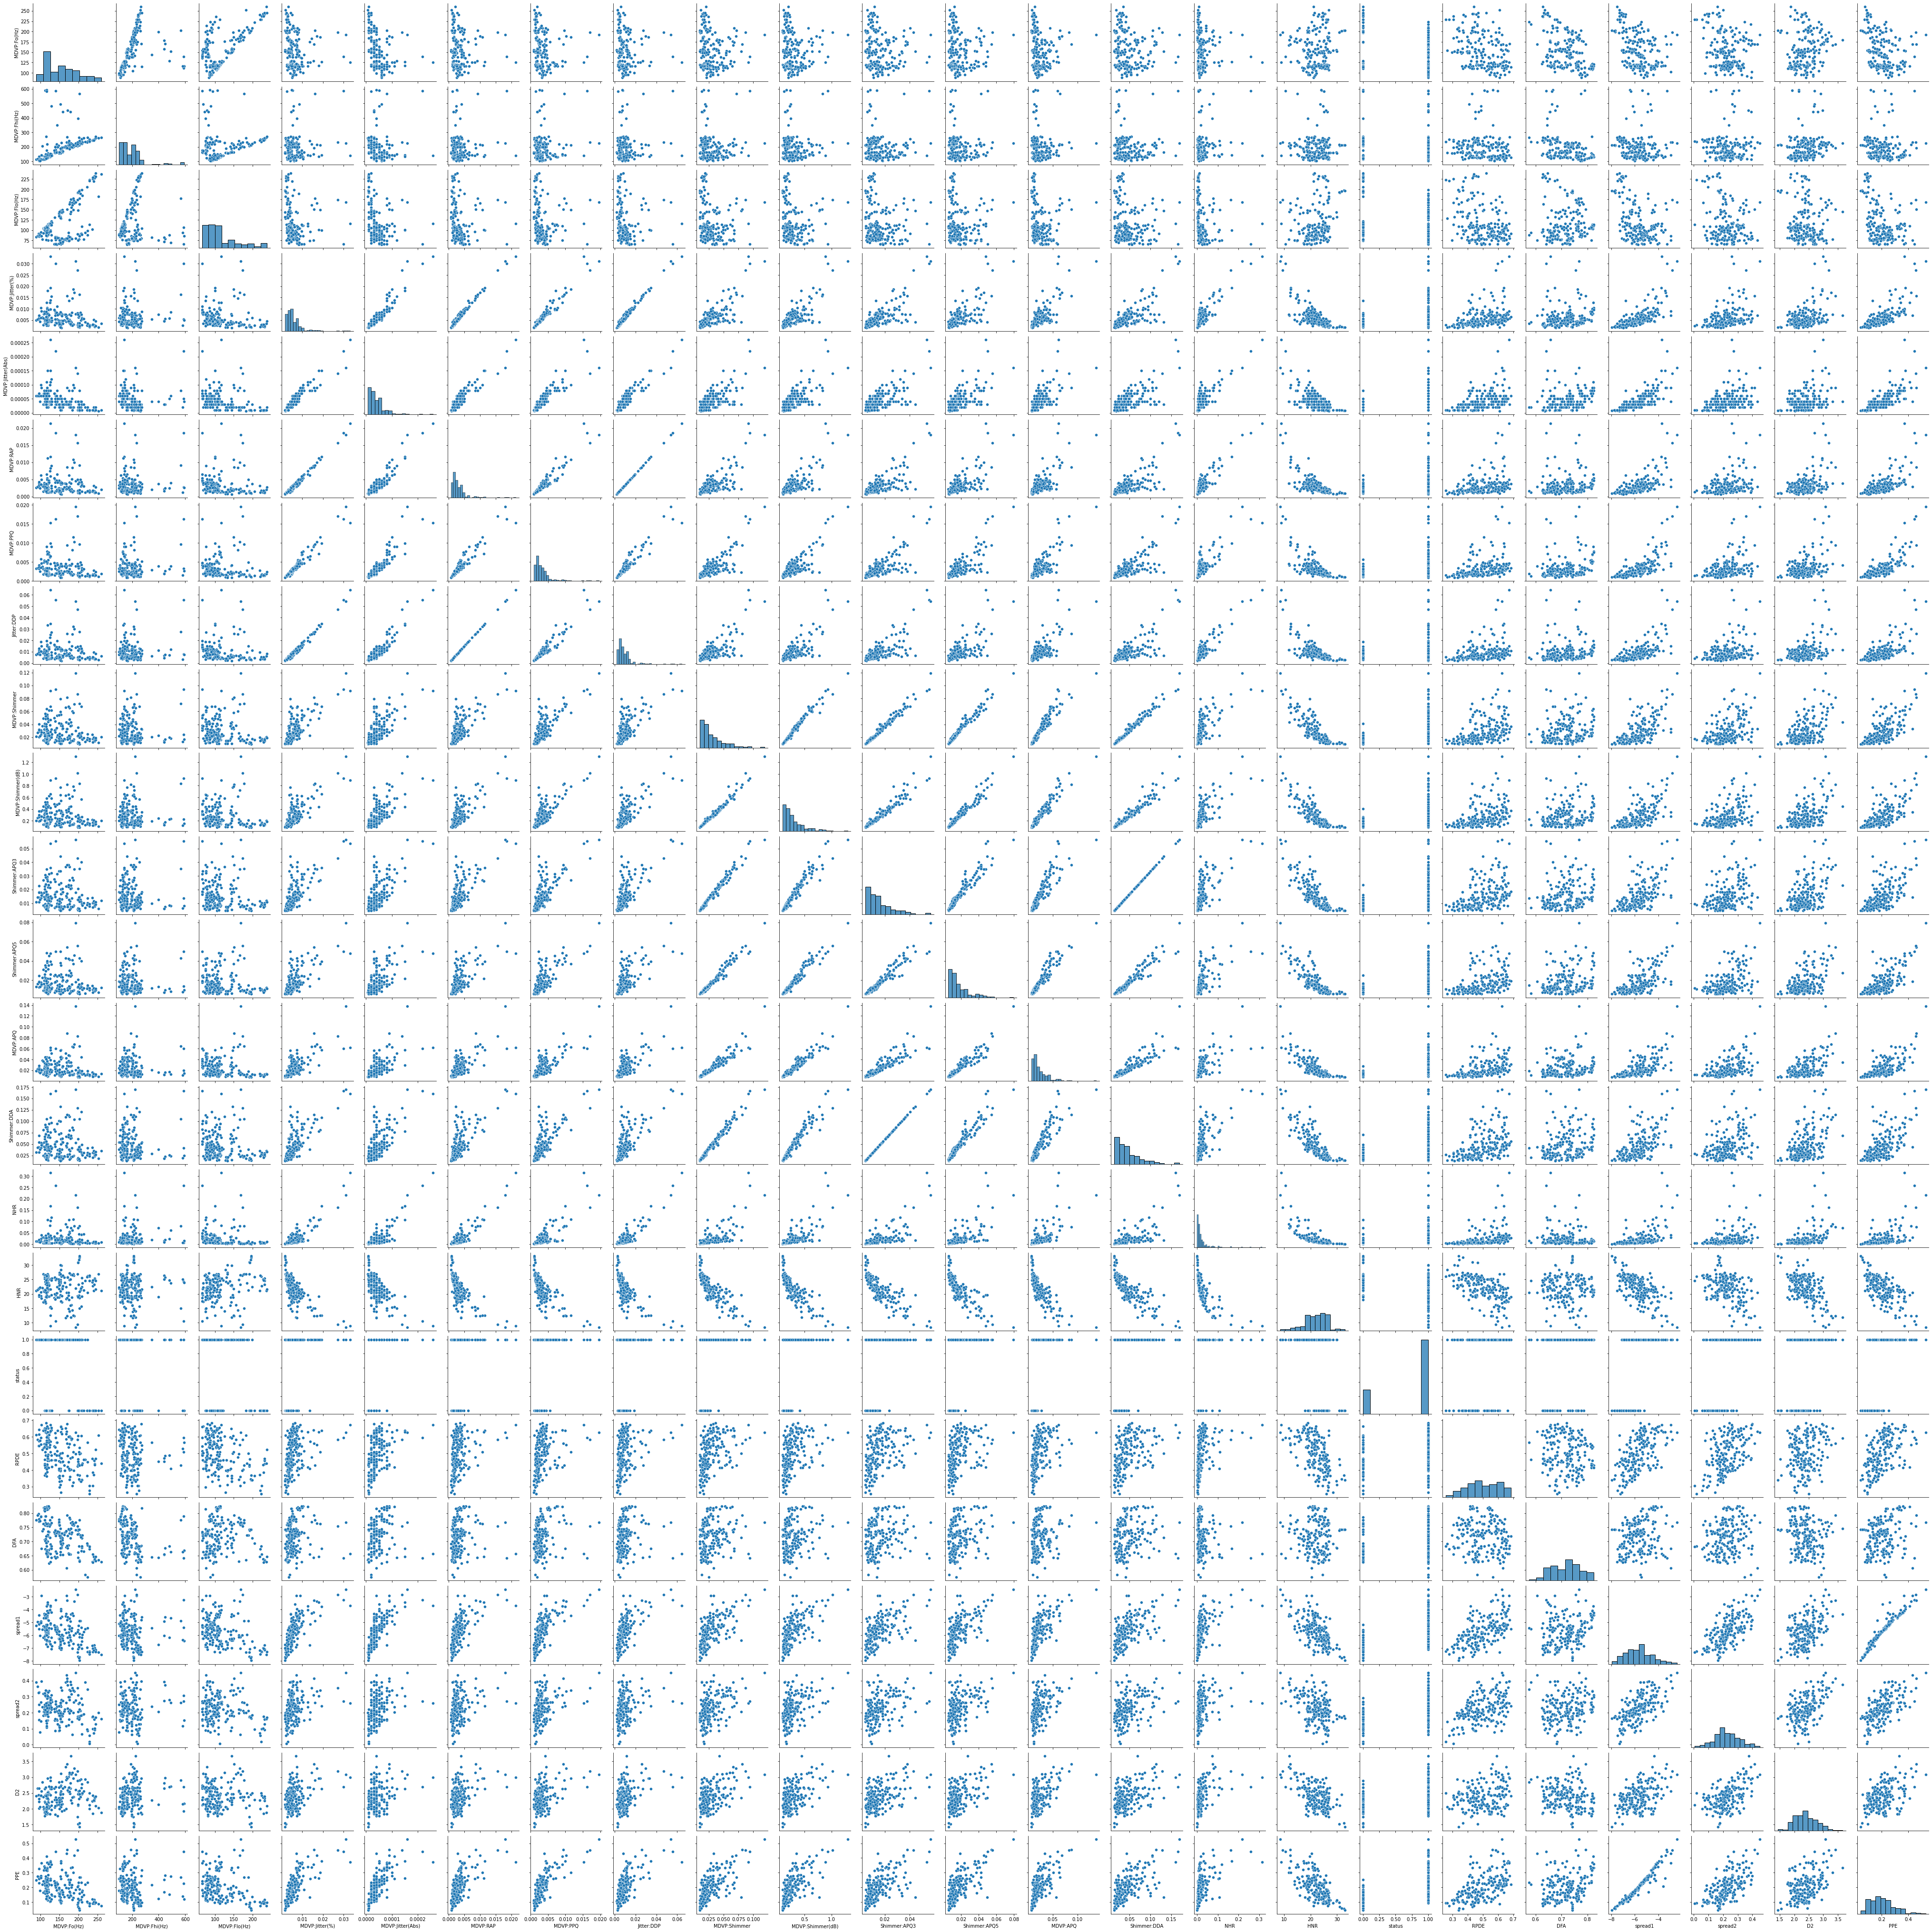

In [ ]:
#distribution info of the data

sns.pairplot(df)

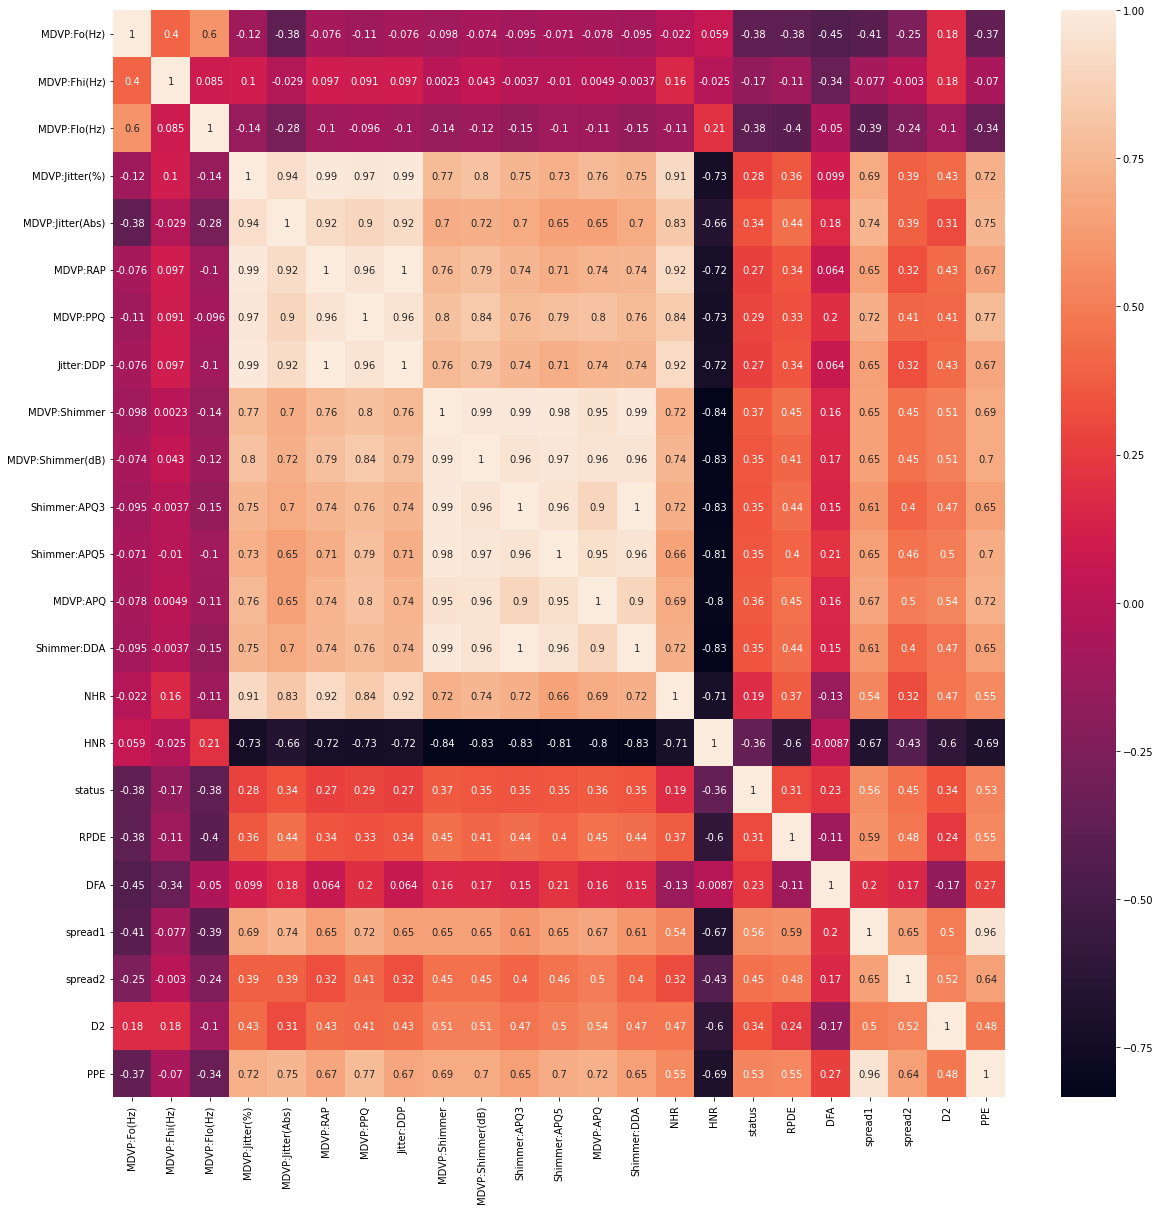

In [ ]:
plt.figure(figsize=(20,20))   #correlation finding
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
x=df.drop(["status", "name"], axis=1)
y = df["status"]                #separating independent & dependent variables

In [ ]:
from imblearn.over_sampling import RandomOverSampler   #detecting label balance
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({1: 147, 0: 48})


In [ ]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler((-1,1))   #algorithm scaling
x=scaler.fit_transform(X_ros)
y=y_ros

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.95)    #scikit learn chose the minimum number of principal components like 95% of the variance is retained
X_PCA = pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2, random_state=7)

In [ ]:
# Algorithm apply
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

list_met=[]
list_accuracy=[]

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression (C=0.4,max_iter=1000, solver = 'liblinear')
lr=classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

accuracy_LR = accuracy_score(y_test, y_pred)

from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier(random_state=14)
dt= classifier2.fit(x_train, y_train)

y_pred2 = classifier2.predict(x_test)

accuracy_DT = accuracy_score(y_test,y_pred2)



In [ ]:
#Random forest apply for info gain

from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)

y_pred3 = classifier3.predict(x_test)

accuracy_RFI = accuracy_score(y_test, y_pred3)

In [ ]:
#Random forest for entropy

from sklearn.ensemble import RandomForestClassifier

classifier4 = RandomForestClassifier(criterion = 'entropy')
rfe = classifier4.fit(x_train, y_train)

y_pred4 = classifier4.predict(x_test)

accuracy_RFE = accuracy_score(y_test, y_pred4)


In [ ]:
#SVM (support vector machine) applying

from sklearn.svm import SVC

model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)

y_pred5 = model_svm.predict(x_test)

accuracy_svc = accuracy_score(y_test, y_pred5)

In [ ]:
#KNN(K nearest neighbour) applying

from sklearn.neighbors import KNeighborsClassifier

model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn = model_knn3.fit(x_train, y_train)

pred_knn3 = model_knn3.predict(x_test)

accuracy_SVM = accuracy_score(y_test, pred_knn3)


In [ ]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)

pred_gnb = gnb.predict(x_test)

accuracy_GNB = accuracy_score(y_test, pred_gnb)

In [ ]:
#Bernoulli Naive Bayes

from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
bnb = model.fit(x_train, y_train)

pred_bnb = model.predict(x_test)

accuracy_BNB = accuracy_score(y_test, pred_bnb)

                       Method Used  Accuracy
0              Logistic Regression  0.830508
1                    Decision Tree  0.932203
2  Random Forest(information gain)  0.949153
3           Random Forest(Entropy)  0.949153
4                              SVM  0.949153
5                              KNN  0.966102
6                              gnb  0.881356
7                              bnb  0.847458
8                voting classifier  0.881356
AxesSubplot(0.125,0.125;0.775x0.755)


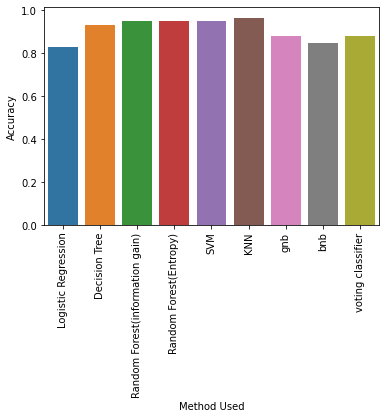

In [ ]:
#Combining these all using voting classifier

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr',lr),('rfi',rfi), ('rfe',rfe),('DT',dt),('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting = 'hard', flatten_transform=True)

model_evc = evc.fit(x_train, y_train)

pred_evc = evc.predict(x_test)

accuracy_evc = accuracy_score(y_test, pred_gnb)

list1 = ['Logistic Regression', 'Decision Tree', 'Random Forest(information gain)', 'Random Forest(Entropy)', 'SVM', 'KNN', 'gnb', 'bnb', 'voting classifier']

list2 = [accuracy_LR, accuracy_DT,accuracy_RFI, accuracy_RFE, accuracy_svc, accuracy_SVM, accuracy_GNB, accuracy_BNB,accuracy_evc]
list3 = [classifier, classifier2, classifier3, classifier4, model_svm, model_knn3,gnb,model]

df_Accuracy = pd.DataFrame({'Method Used': list1, 'Accuracy':list2})
print(df_Accuracy)

chart = sns.barplot(x = 'Method Used', y = 'Accuracy', data = df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
print(chart)


In [ ]:
from xgboost import XGBClassifier

model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred=model_xg.predict(x_test)    #calculating accuracy of the model
print(accuracy_score(y_test,y_pred)*100)

96.61016949152543


In [ ]:
from sklearn.metrics import confusion_matrix   #for getting useful visualisation imp. predictive analysis
cm = confusion_matrix(y_test, y_pred)          # such as recall, specificity, accuracy

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'binary')

0.9705882352941176

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.94      0.97        35

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Confusion Matrix:
[[24  0]
 [ 2 33]]


In [ ]:
for i in list3:
  print(" *********************** ", i, " ******************** ")
  print(classification_report(y_test, i.predict(x_test)))
  print('Confusion Matrix:')
  print(cm)
  print()

 ***********************  LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')  ******************** 
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.93      0.77      0.84        35

    accuracy                           0.83        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.85      0.83      0.83        59

Confusion Matrix:
[[24  0]
 [ 2 33]]

 ***********************  DecisionTreeClassifier(random_state=14)  ******************** 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.92      0.97      0.94        35

    accuracy                           0.93        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.93      0.93      0.93        59

Confusion Matrix:
[[24  0]
 [ 2 33]]

 ***********************  RandomForestClassifier(random_state=14)  ****

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

def plot_roc(model, x_test, y_test):

  probabilities = model.predict_proba(np.array(x_test))
  predictions = probabilities
  fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])  #fpr,tpr -for all thresholds of the classificatiom
  roc_auc = auc(fpr, tpr)

  plt.title('Receiver operating characteristics')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0,1], [0,1], 'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

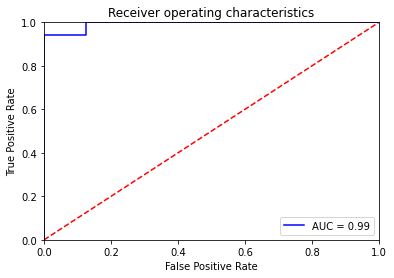

In [ ]:
plot_roc(model_xg, x_test, y_test)   #Gives better idea about the performance of the mode


 ------------ROC FOR  Logistic Regression  + PCA------------


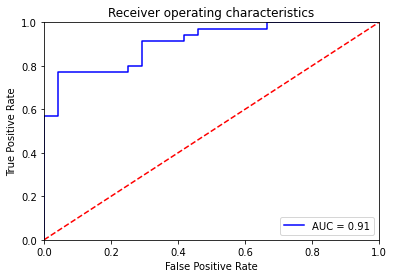



 ------------ROC FOR  Decision Tree  + PCA------------


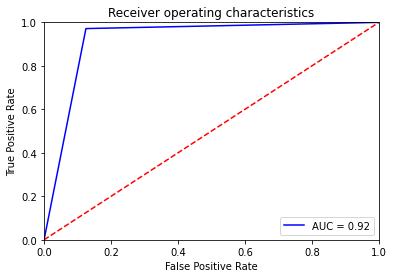



 ------------ROC FOR  Random Forest(information gain)  + PCA------------


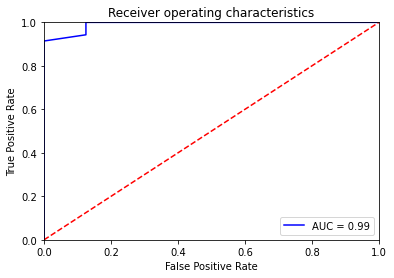



 ------------ROC FOR  Random Forest(Entropy)  + PCA------------


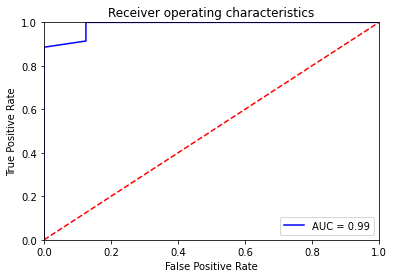



 ------------ROC FOR  SVM  + PCA------------
ROC Not Valid

 ------------ROC FOR  KNN  + PCA------------


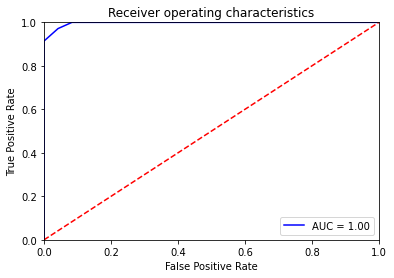



 ------------ROC FOR  gnb  + PCA------------


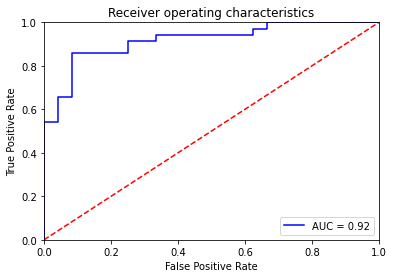



 ------------ROC FOR  bnb  + PCA------------


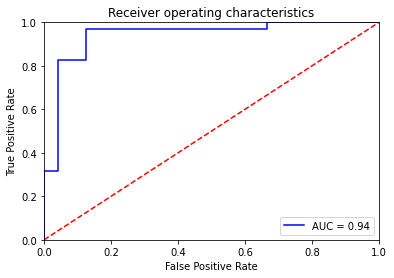

In [ ]:
for i in range(0,len(list3)):
  try:
    print()
    print(" ------------ROC FOR ", list1[i], " + PCA------------")
    plot_roc(list3[i], x_test, np.array(y_test))
    print()

  except:
    print("ROC Not Valid")
